# Representation of signals & inverse problems - G1-G2
---
## Lab 1: Introduction to time-frequency analysis

**Objective**: This practical session consists in a series of 4 short exercises introducting the time-frequency analysis of sounds (acoustic signals).

## Configuration

In [ ]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
# %matplotlib widget
%matplotlib inline
# %matplotlib notebook

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
from scipy.signal import *
from scipy.io.wavfile import *
from scipy.io import *
from numpy.fft import *
from matplotlib.colors import LogNorm  # for Log normalization
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# to install sounddevice library: type the following code in Anacoda prompt window : pip install sounddevice
import sounddevice as sd

>[Representation of signals & inverse problems - G1-G2](#content=&scrollTo=2LLHY64rF7d7)

>>[Lab 1: Introduction to time-frequency analysis](#content=&scrollTo=2LLHY64rF7d7)

>>[Configuration](#content=&scrollTo=aMhM6uOLF7d_)

>>[Contents](#content=&scrollTo=7rRjjrRxF7eC)

>>[Section 1: Fourier analysis (spectral analysis)  (↑)](#content=&scrollTo=GiDOKx02F7eC)

>>>[Reading, displaying, listening to a signal](#content=&scrollTo=i9PgwtaTF7eC)

>>>>[Reading](#content=&scrollTo=NdHWQhxEF7eC)

>>>>[Listen](#content=&scrollTo=cmkU-AyuF7eD)

>>>>[Display](#content=&scrollTo=4uEc75igF7eE)

>>>>[Let's have a look at the time-frequency content of this signal, using its spectrogram (see Section 3):](#content=&scrollTo=a4PYZSS0F7eE)

>>>>[Now consider a limited portion fo the signal, considering only n samples:](#content=&scrollTo=F44_QzDeF7eF)

>>>[Fourier transform of the signal](#content=&scrollTo=_AAMOgqPF7eG)

>>>[Exercise 1  (↑)](#content=&scrollTo=kmKe-UFjF7eI)

>>>>[Local oscillations of a signal](#content=&scrollTo=jjPwAcyvF7eJ)

>>[Section 2 : Fourier analysis of segments  (↑)](#content=&scrollTo=ZAaIR7KIF7eK)

>>>[Exercice 2  (↑)](#content=&scrollTo=6jMvmywbF7eN)

>>[Section 3: Introduction to time-frequency analysis  (↑)](#content=&scrollTo=qttlfDzwF7eP)

>>>[Short-Time Fourier Transform: spectrogram & reconstruction](#content=&scrollTo=pP8ibii4F7eP)

>>>[Exercice 3  (↑)](#content=&scrollTo=x90NjmYwF7eR)

>>>[Time-frequency analysis of hyperbolic chirps](#content=&scrollTo=TkSJewVUF7eR)

>>>[Exercice 4  (↑)](#content=&scrollTo=PEslflkTF7eS)

>>[Appendix: time-frequency atoms using the Hanning window  (↑)](#content=&scrollTo=rljTeVBkF7eS)

>>>>[Displaying the windows](#content=&scrollTo=VU8maqrJF7eT)

>>>[In the time-frequency plane for an atom at time $t_1$ and frequency $10f$ :](#content=&scrollTo=C2lWHkGoF7eT)

>>>>[What does an atom sound like ?](#content=&scrollTo=dabROEkXXogZ)

>>>>[What does an atom look like in the time-frequency plane ?](#content=&scrollTo=a3yAoZhbF7eU)



---
## Section 1: Fourier analysis (spectral analysis) <a id="section1"></a> [(&#8593;)](#content)

### Reading, displaying, listening to a signal

#### Reading
Signals can be represented as 1D vectors, stored as a row or a column vector.

You can access the help of a specific Python function by pressing `Maj+Tab+Tab` when the cursor is on the desired function.

The following instruction reads a signal from a `.wav` file (song of a bird), before we can listen to it or display it.

In [ ]:
fs, x = read("/content/bird.wav")

`fs` is the sampling frequency. You can check its value before going on.

In [ ]:
print(fs)

44100


#### Listen

In [ ]:
display(Audio("/content/bird.wav", autoplay=True))

In [ ]:
np.max(x)

32767

#### Display

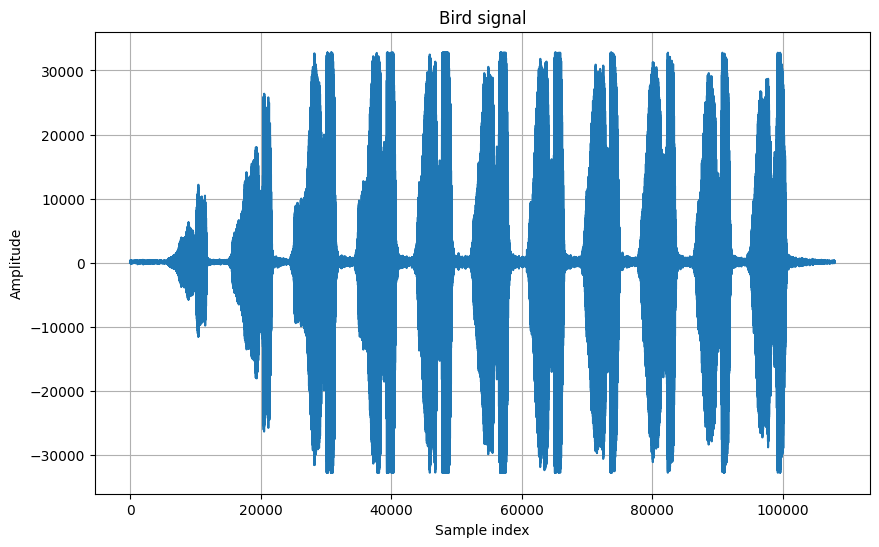

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x)
plt.grid()
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Bird signal")
plt.show()

#### Let's have a look at the time-frequency content of this signal, using its spectrogram (see [Section 3](#Section3)):

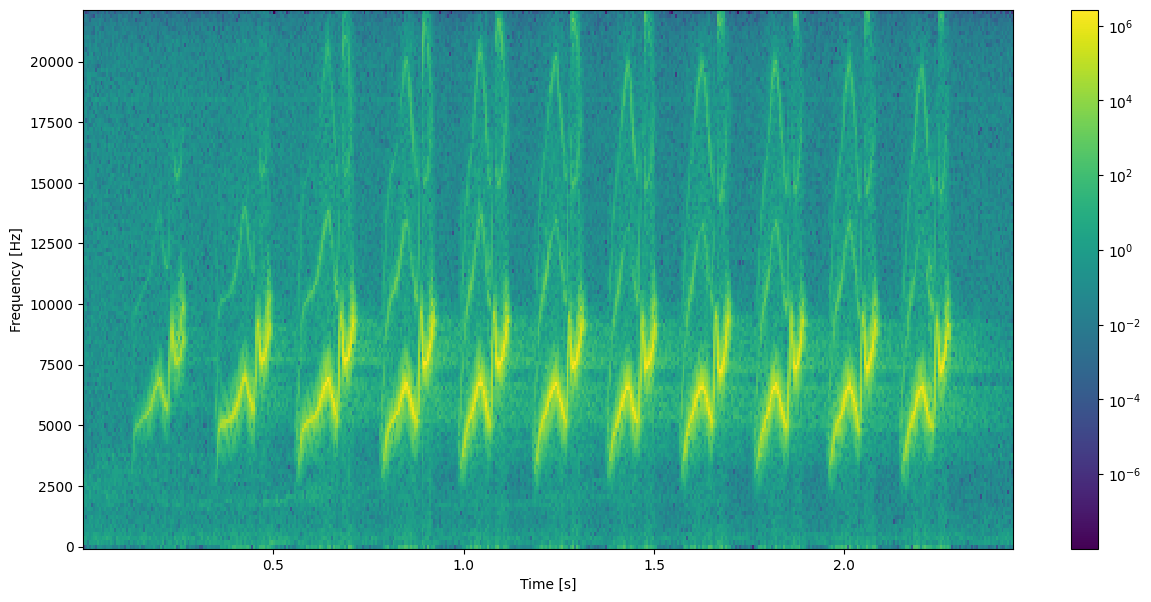

In [ ]:
f, t, Sxx = spectrogram(x, fs, nperseg=256)

plt.figure(figsize=(15, 7))
plt.pcolormesh(t, f, Sxx, norm=LogNorm(), shading="auto")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar()
plt.show()

One can visualize a small segment of the signal (in the time domain) and observe its oscillatory behaviour:

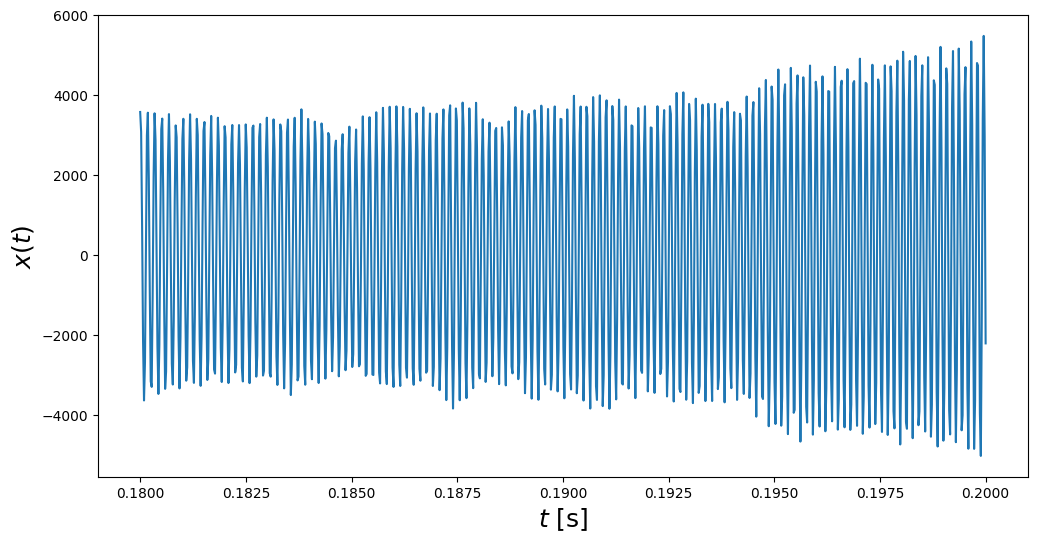

In [ ]:
t0 = 0.18
T = 0.02

t = np.linspace(
    t0, t0 + T, int(fs * T))

plt.figure(figsize=(12, 6))

plt.plot(t, x[int(fs * t0) : int(fs * (t0 + T))])

plt.xlabel(r"$t$ [s]", fontsize=18)
plt.ylabel(r"$x(t)$", fontsize=18)
plt.show()

#### Now consider a limited portion fo the signal, considering only `n` samples:

In [ ]:
n = 2 ** 15  # 32768 samples
y = x[:n,]

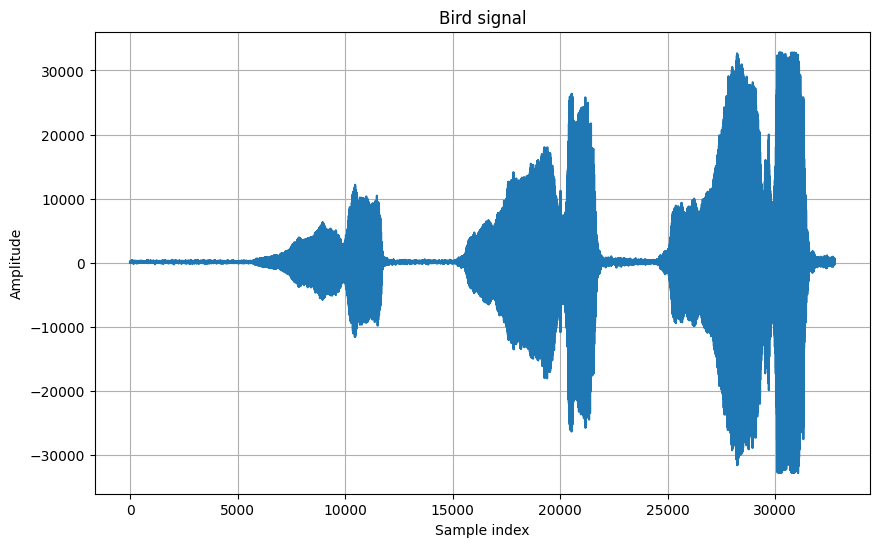

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.grid()
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Bird signal")
plt.show()

### Fourier transform of the signal

One can first compute the discrete Fourier transform of the signal and display its modulus to have an idea about the distribution of its energy in the frequency space (remember that $S_x(\nu) = |X(\nu)|^2$ for continous-time signal of finite energy, with $S_x$ the energy spectral density of $x$).

The frequencies at which the discrete Fourier transform is computed go from $0$ to $(n-1)\frac{f_s}{n}$ (with $n$ the number of signal samples), with a regular frequency step $\frac{f_s}{n}$:

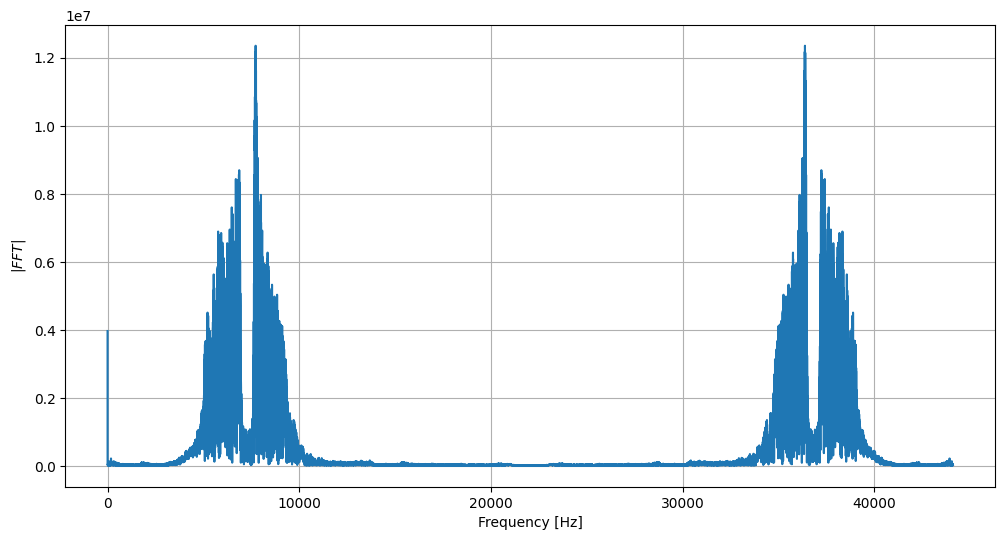

In [ ]:
n = 2 ** 15
xn = x[0:n]

Xf = fft(xn)

freq = np.arange(0, n * fs / n, fs / n)  # list of frequencies associated with the DFT

plt.figure(figsize=(12, 6))
plt.plot(freq, abs(Xf))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$| FFT |$")
plt.grid()
plt.show()

For a better readability and to highlight the Hermitian symmetry of the Fourier transform of real signals, the `fftshift` function centers frequencies around $0$, between $ -\frac{f_s}{2} $ and $ (n-1)\frac{f_s}{2n}$.

One can use the `fftfreq`function to automatically access the associated list of frequencies.

_Remark: note that the `fftfreq` function produces frequencies from 0 to $f_s/2$ followed by frequencies from $-f_s/2$ to $0$._

In [ ]:
freq = fftfreq(n, d=1.0 / fs)

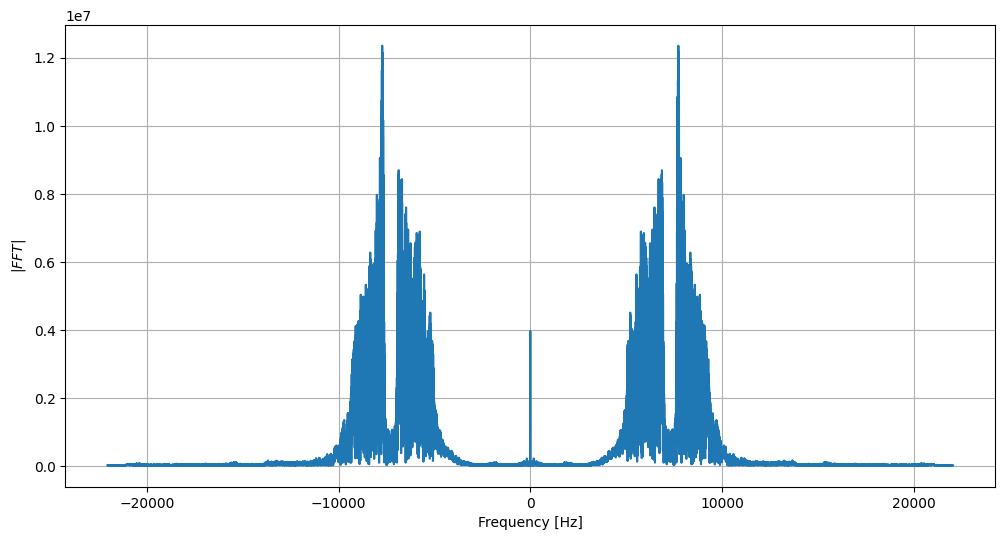

In [ ]:
x_f = fftshift(fft(xn))

freq = fftshift(fftfreq(n, d=1.0 / fs))  # scipy function

plt.figure(figsize=(12, 6))
plt.plot(freq, abs(x_f))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$| FFT |$")
plt.grid()
plt.show()

In [ ]:
x_max = np.argmax(np.abs(x_f[int(len(x_f)/2):]))
main_freq = (np.argmax(np.abs(x_f[int(len(x_f)/2):]))*fs/n)
main_freq_2 = (np.argmax(np.abs(x_f[int(len(x_f)/2):int(len(x_f)/2)+x_max-100]))*fs/n)
print('The two main frequencies of the audio file are %d Hz and %d Hz.' % (main_freq, main_freq_2))

The two main frequencies of the audio file are 7723 Hz and 6867 Hz.


### Exercise 1 <a id="ex1"></a> [(&#8593;)](#content)
1. What is the value of the sampling frequency `fs` used above? What does it correspond to?
2. What are the characteristic frequencies of the bird song studied here?

**Answers :**
1. fs=44100. The sampling frequency is the number of measures of the amplitude of the signal each second.
2. The bird song mostly contains frequencies between 4k and 10k Hz. However, frequencies around 7k Hz have a low amplitude, which spilts the interval in two main frequency groups around it. The main frequencies of each group are 6867 Hz and 7723 Hz with 7723 Hz having the biggest amplitude of the two (cf. code above).

The Fourier transform only gives access to a global information on the frequency content of the signal. A "local" Fourier analysis would be useful to have a more precise description of the sound, such as local amplitude and local frequency variations (local in the temporal domain).

#### Local oscillations of a signal

A sound is usually a locally oscillating, quasi-stationary signal. We illustrate this property by looking more closely at different segments of the signal (in the time domain).

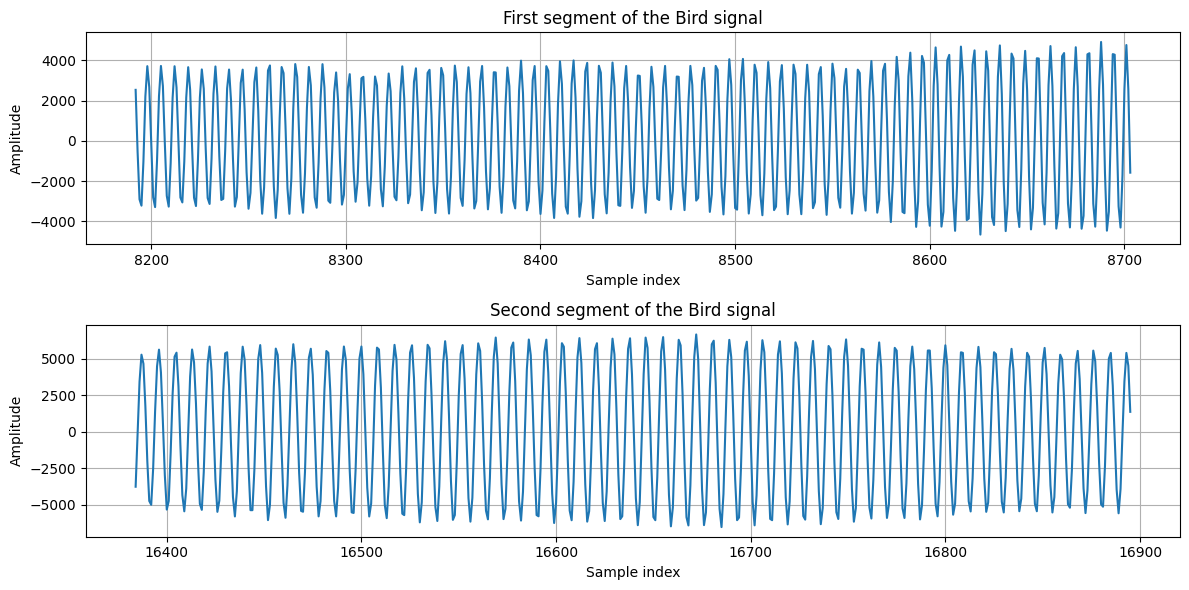

In [ ]:
t = np.arange(0, n, 1)
p = 512  # number of samples of a piece of signal


plt.figure(figsize=(12, 6))

sel = int(n / 4) + np.arange(0, p)  # list of times considered
plt.subplot(211)
plt.plot(t[sel], y[sel])
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("First segment of the Bird signal")
plt.grid()

sel = int(n / 2) + np.arange(0, p)
plt.subplot(212)
plt.plot(t[sel], y[sel])
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Second segment of the Bird signal")
plt.grid()
plt.tight_layout()
plt.show()

---
## Section 2 : Fourier analysis of segments <a id="section2"></a> [(&#8593;)](#content)

In this section, we will consider the Fourier transform (use the `fft` & `fftshift` functions) of segments of the signal `w*x`, where `w` is a window function centered in `tk`. One can use for instance a Gaussian window containing $2N+1$ samples, with $N=400$ and a standard deviation $\sigma = 200$.

**Note:** you should always have $n_0> N$, where $n_0$ denotes the index of a time instant of interest.

In [ ]:
t = np.arange(0, x.size) / fs  # list of times considered

n0 = 10000  # corresponds to instant (n0-1)/fs in time
# t0 = (n0-1)/fs  # instant of interest

N = 400  # half width of the analysing window

L = 2 * N + 1
# number of samples considered per segment

sel = np.arange(n0 - N, n0 + N + 1, 1)  # sample indices of the selected segment

sigma = 200  # standard deviation of the Gaussian window

gauss_win = get_window(("gaussian", sigma), L)

Displaying the window as a function of the sample index

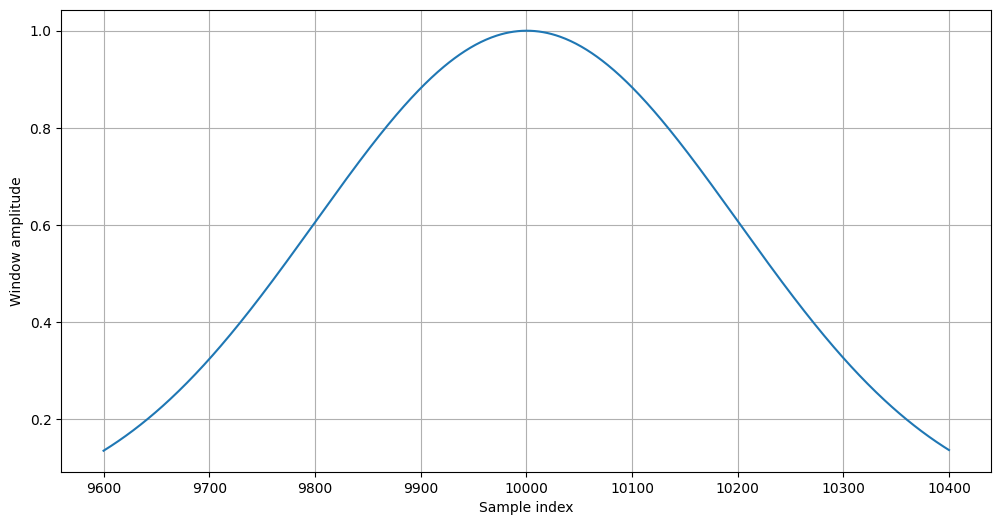

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sel, gauss_win)
plt.xlabel("Sample index")
plt.ylabel("Window amplitude")
plt.grid()
plt.show()

Displaying the window as a function of time:

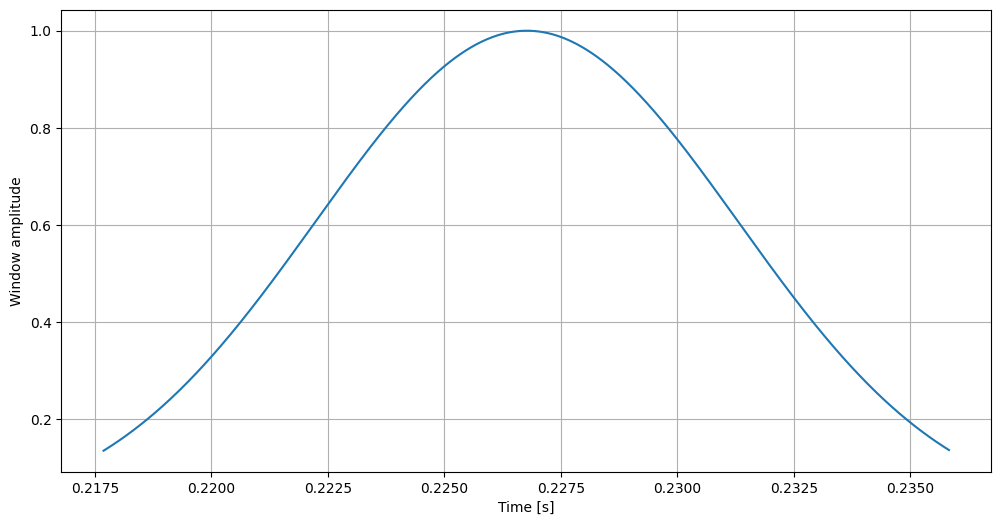

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t[sel], gauss_win)
plt.xlabel("Time [s]")
plt.ylabel("Window amplitude")
plt.grid()
plt.show()

We extract the signal segment taken for local Fourier analysis, and multiply it by the Gaussian window centered at $n_0$ (corresponding to time $t_0 = (n_0-1)/f_s$:

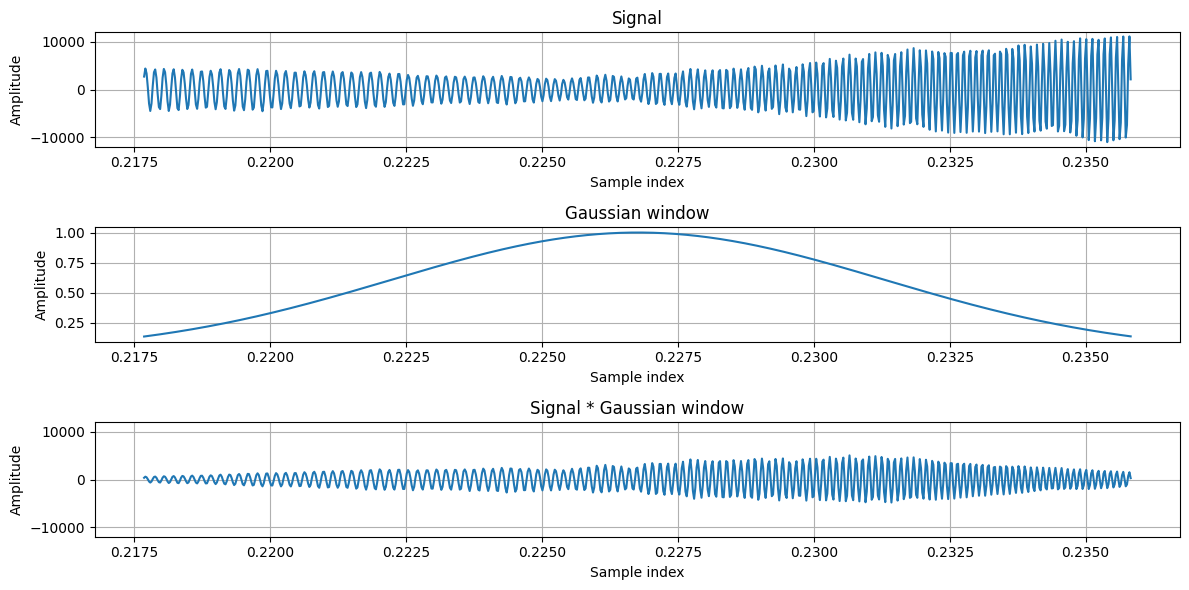

In [ ]:
x_segment = gauss_win * xn[sel]

plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(t[sel], xn[sel])
plt.ylim(-12000,12000)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.grid()

plt.subplot(312)
plt.plot(t[sel], gauss_win)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Gaussian window")
plt.grid()

plt.subplot(313)
plt.plot(t[sel], x_segment)
plt.ylim(-12000,12000)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Signal * Gaussian window")
plt.grid()
plt.tight_layout()
plt.show()

We compute and display the amplitude spectrum of the segment:

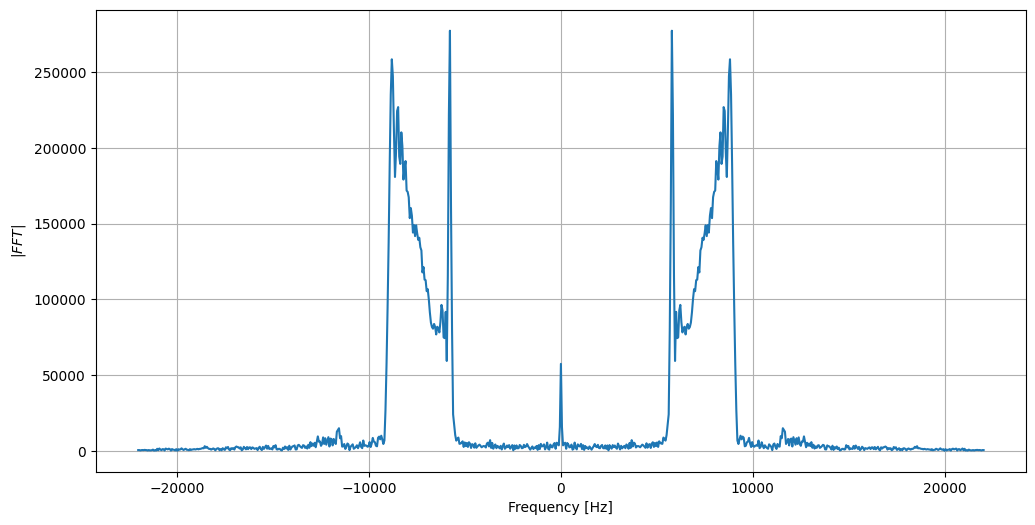

In [ ]:
Xf = fftshift(fft(x_segment))
freq = fftshift(fftfreq(Xf.size, d=1.0 / fs))  # scipy function

plt.figure(figsize=(12, 6))
plt.plot(freq, abs(Xf))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$| FFT |$")
plt.grid()
plt.show()

### Exercice 2 <a id="ex2"></a> [(&#8593;)](#content)

1. What does the segmented analysis highlight?

2. Why do we multiply the segment of signal with a Gaussian (or other) window before computing its Fourier transform ?

**Answers**

1. The segmented analysis highlights the evolution of the frequency content of the signal with time?.

2. The multiplication by a window makes it possible to focus on the frequency content of the signal around a particular instant. Indeed, the amplitude of the window fades as the instant moves away from t0, giving a bigger influence to the oscillations closer to t0 on the frequency content of the signal at that instant.

---
## Section 3: Introduction to time-frequency analysis <a id="section3"></a> [(&#8593;)](#content)

### Short-Time Fourier Transform: spectrogram & reconstruction

In order to follow the evolution of the frequency content of a signal over time, one can use the _Short-Time Fourier Transform (STFT)_. This representation has 2 indices, one for the time instant where
the window is centered, and another for the frequencies.
In practice, computing the STFT first consists in dividing the time signal into shorter segments, of equal length. A Fourier transform is then computed separately for each of the extracted segments. This reveals the Fourier spectrum of each shorter segment.

The interest of this representation is to gather local Fourier transforms (vertical frequency axis) calculated on regularly spaced time windows (horizontal time axis) so as to deduce the **spectrogram**, a 2D visual heat map. The square of the amplitude of the STFT is interpreted as a time-frequency energy density.

In general, windows overlap in time, which leads to a certain redundancy enhancing the readability of the time-frequency information. This redundant representation can be reversed (_pseudo-inverse_) to reconstruct the original signal. One can show that the energy is preserved from the time to the frequency domain.

The parameters to compute a spectrogram parameters are:

* the shape of the analysis window
* the window size
* the time spacing between 2 successive windows, denoted `spacing` here, which also conditions the amount of overlap between consecutive windows.

The `stft` function is used to calculate the Short-Time Fourier Transform of a given signal, while the `spectrogram` function provides a graphical representation. The vertical axis corresponds to the frequencies (positive only) sampled between $ 0 $ and $ \frac{f_s}{2} $, and the horizontal axis to temporal samples.

An example of application is given below:

In [ ]:
n = 50000
t = np.arange(n)/fs

fs, x = read("/content/glockenspiel_mono.wav")
y = x[0:n]

display(Audio("/content/glockenspiel_mono.wav", autoplay=True))

Computing the STFT transform of the signal:

In [ ]:
width = 512
spacing = width / 8
window = "hann"

t_stft, f_stft, x_stft = stft(
    x, fs=1.0, window="hann", nperseg=width, noverlap=spacing - width
)

**Indication:** A logarithmic scale is used to display the spectrogram amplitude.
In addition, the times and frequencies at which the spectrogram is observed are given by

    nf, nw = S[0].size, S[1].size
    T = n/fs
    t_stft = arange(0,nw)*T/spacing
    f_stft = arange(0,nf/2)*fs/width

**Graphical representation of an analysis window**

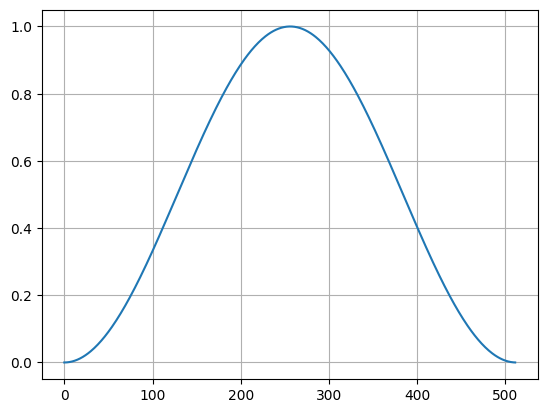

In [ ]:
w = get_window("hann", width)
plt.plot(w)
plt.grid()
plt.show()

**Graphical representation of the spectrogram**:
you can either choose the STFT modulus calculated above, or use the `spectrogram` function which calculates the square of its modulus (due to the energy conservation theorem for the STFT).

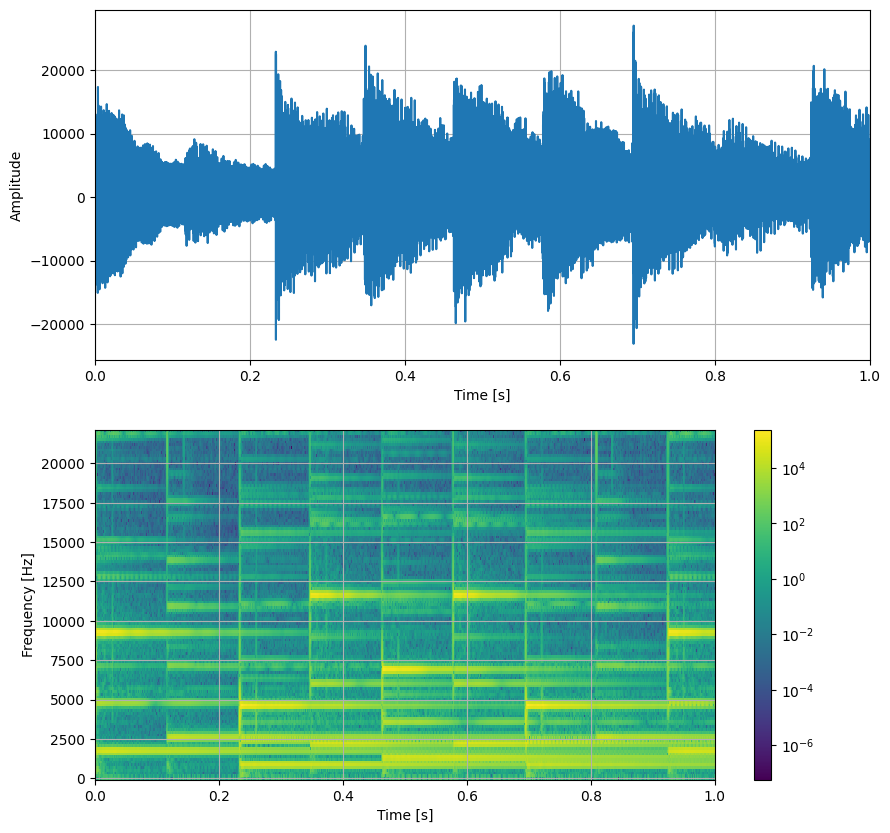

In [ ]:
plt.figure(figsize=(10, 10))

# The signal in time domain
plt.subplot(211)
plt.plot(t[0:n], y)
plt.xlim(0,1)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.grid()

# Time frequency representation
plt.subplot(212)
width = 256
spacing = width / 8
f_Sy, t_Sy, Sy = spectrogram(
    y, fs, window="hann", nperseg=width, noverlap=width - spacing
)
ax = plt.pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
plt.xlim(0,1)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()

### Exercice 3 <a id="ex4"></a> [(&#8593;)](#content)
**Question :** Explain how the horizontal and vertical axes of the
spectrogram have been indexed and discretized. How should one read and interpret them?

**Answer :** The time-frequency representation above represents the sqare modulus of the STFT of the signal. By computing the Fourier transform of the signal multiplied by a window sliding along the time axis, one can visualize the evolution of the frequency content of a signal with time. In this representation, horizontal bars represent frequecies of the signal at the corresponding time intervals. In this example, there are indeed these horizontal bars corresponding to the root notes and the harmonics played by the instrument. There are also vertical bars that represent the "attack" portion of each note. At these particular moments, the instrument emits a short percussive sound, characterized by a wide range of frequencies.

### Time-frequency analysis of hyperbolic chirps

In this section, we consider the superposition of 2 "chirps", *i.e.*, signals whose frequency varies continuously, in a hyperbolic way (see the help of the `chirp` function in Python). As a result, we face a resolution problem, since the width of the window is constant for the entire signal, and may thus not be suitable for all the time instants.

The ultrasonic cries produced by bats typically have a similar structure, as well as gravitational waves observed in astrophysics.

In [ ]:
fs = 4096
T = 3
f1_min, f1_max = 200, 1600
f2_min, f2_max = 250, 1650

t = np.linspace(0, 3, fs * T)
y1 = chirp(t, f1_min, T, f2_max, method="hyperbolic")
y2 = chirp(t, f2_min, T, f2_max, method="hyperbolic")
y = y1 + y2

In [ ]:
Audio(y, rate=fs, autoplay=True)

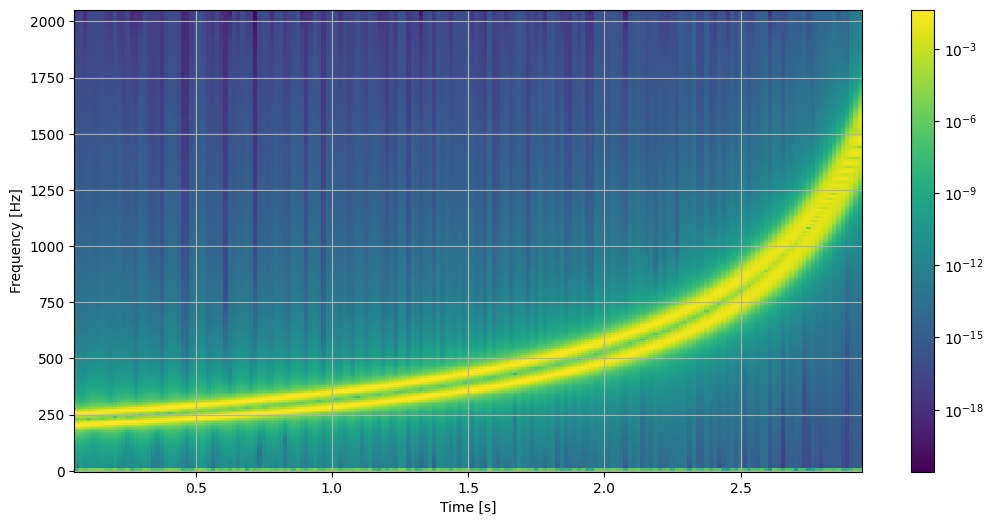

In [ ]:
width = 512
window = get_window("hann", width)

plt.figure(figsize=(12.7, 6))
f_Sy, t_Sy, Sy = spectrogram(
    y, fs=fs, window=window, nperseg=width, noverlap=7 * width / 8
)
plt.pcolormesh(
    t_Sy, f_Sy, Sy, norm=LogNorm()
)  # the top of the spectrogram corresponds to the high frequencies
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()

### Exercice 4 <a id="ex6"></a> [(&#8593;)](#content)

**Question :** Observe the results obtained by the above analysis. What is the nature of this signal?


**Answer :** The signal is the sum of two sine waves with continuously varying frequencies that increase hyperbolically and differ by 50 Hz at any instant. With these settings of window, width and overlap, the time-frequency representation makes it easy to distinguish the two signals at the beginning, but it becomes impossible at the end. Indeed, as the difference between the frequencies of each signal remains constant while each frequency increases, the relative difference between the frequencies decreases from 20% at the beginning to 3% at the end.

## Appendix: time-frequency atoms using the Hanning window <a id="appendix"></a> [(&#8593;)](#content)

Each coefficient of the STFT could be seen as the scalar product of the signal of interest and a time-frequency atom. Atoms are obtained by shifting the basic window into time and frequency (amplitude modulation). We represent here some atoms obtained from the Hanning window.

Examples of atoms using Hann's window: observe the effect of translations in time and frequency.

In [ ]:
w = 256  #
fs = 1024  # sampling frequency

t = np.arange(-w / 2, 3 * w - 1, 1) / fs  # set of reference instants for atom at 0
t1 = 0.4  # t[-1]-1.3*w/fs    # set of instants for 2 * w translated atom
f = 8 / w * fs  # frequency different from zero in g3 to g6

# Position 0, frequency 0 (measures the contribution of a local offset
g1 = (np.cos(np.pi * t * fs / w) ** 2) * np.double(abs(t) < w / fs / 2)

# Position t1, frequency 0
g2 = (np.cos(np.pi * (t - t1) * fs / w) ** 2) * np.double(abs(t - t1) < w / fs / 2)

# Position 0, frequency f
g3 = g1 * np.cos(2 * np.pi * f * t)  # frequency translation <=> amplitude modulation

# Position t1, frequency f
g4 = g2 * np.cos(2 * np.pi * f * t)

# Position 0, frequency 2*f
g5 = g1 * np.cos(2 * np.pi * 2 * f * t)

# Position t1, frequency 2*f
g6 = g2 * np.cos(2 * np.pi * 2 * f * t)

#### Displaying the windows

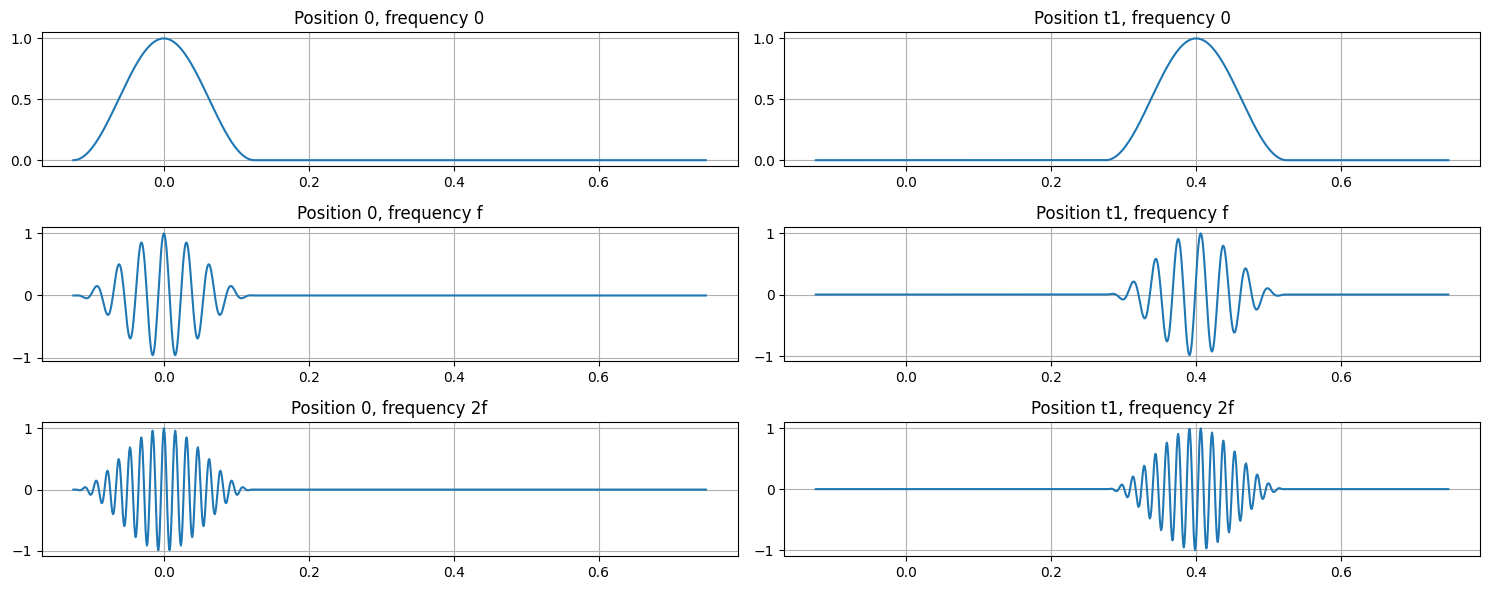

In [ ]:
plt.figure(figsize=(15, 6))

pos = ("0", "t1", "0", "t1", "0", "t1")
fr = ("0", "0", "f", "f", "2f", "2f")

for i in range(6):
    plt.subplot(3, 2, i + 1)
    eval("plt.plot(t,g" + str(i + 1) + ")")
    plt.title("Position " + pos[i] + ", frequency " + fr[i])
    plt.grid()

plt.tight_layout()
plt.show()

### In the time-frequency plane for an atom at time $t_1$ and frequency $10f$ :

Atoms above are easy to represent graphically but not easy to listen to. Let's increase the frequency up to an audible level of a few hundred Hz:

In [ ]:
y = g2 * np.cos(2 * np.pi * 10 * f * t)

#### What does an atom sound like ?

In [ ]:
Audio(y, rate=fs, autoplay=True)

#### What does an atom look like in the time-frequency plane ?

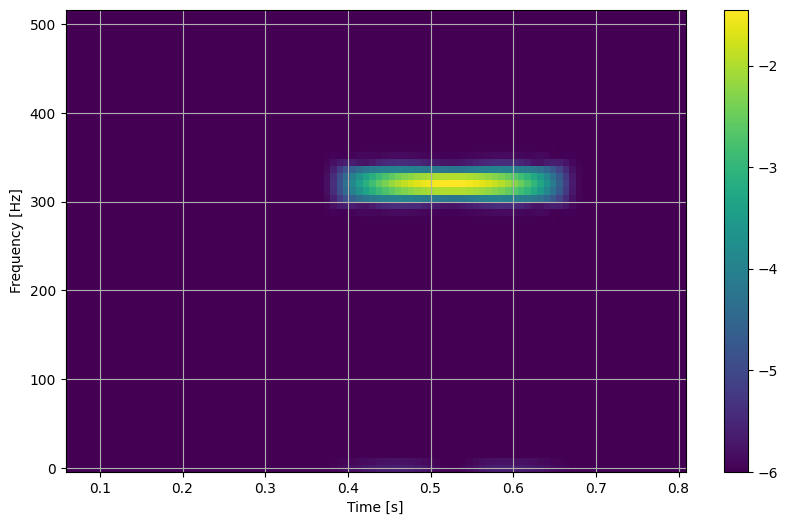

In [ ]:
width = 128
window = get_window("hann", width)

plt.figure(figsize=(10, 6))
f_Sy, t_Sy, Sy = spectrogram(
    y, fs=fs, window=window, nperseg=width, noverlap=15 * width / 16
)
plt.pcolormesh(
    t_Sy, f_Sy, np.log10(Sy + 1e-6)
)  # the top of the spectrogram then corresponds to the high frequencies
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()